---
title: "Modelos Lineales"
date: 2022-03-29T10:43:07+02:00
tags: [modelos lineales, regularización, PolynomialFeatures, Ridge, alpha, regresión logística, regresión lineal]
categories: [tutoriales]
---


En este post profundizaremos en los detalles de los modelos que utilizan parametrización lineal. También veremos cómo usar esta familia de modelos tanto para problemas de clasificación como de regresión. Además, explicaremos cómo enfrentarnos al overfitting usando regularización. Por último, mostraremos cómo los modelos lineales se pueden usar con datos que no presentan linealidad.

# Regresión lineal sin scikit-learn

Antes de presentar las clases disponibles de scikit-learn, vamos a ofrecer algunas ideas con un ejemplo simple. Usaremos el dataset que contiene medidas tomadas de pingüinos.

In [1]:
import pandas as pd

penguins = pd.read_csv("penguins_regression.csv")
penguins.head()

,flipper_length_mm,body_mass_g
0,181,3750
1,186,3800
2,195,3250
3,193,3450
4,190,3650


Formularemos el siguiente problema: usando la longitud de la aleta (*flipper length*) nos gustaría inferir su peso corporal.

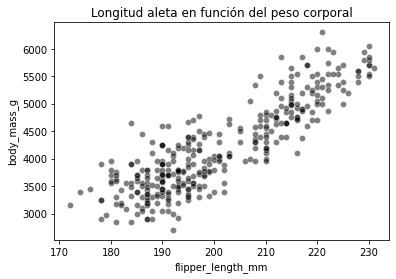

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_name = "flipper_length_mm"
target_name = "body_mass_g"
X, y = penguins[[feature_name]], penguins[[target_name]]

ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
ax.set_title("Longitud aleta en función del peso corporal");

La función `scatterplot` de seaborn toma como entrada el dataframe completo y los parámetros `x` e `y` permiten especificar las columnas a dibujar. Esta función devuelve un eje de matplotlib (denominado `ax` en el ejemplo anterior) que se puede usar para añadir elementos en el mismo eje (como un título).

En este problema, el peso corporal es nuestro objetivo. Es una variable continua que varía aproximadamente entre 2700 g y 6300 g. Por tanto, es un problema de regresión. También veremos que existe una relación casi lineal entre el peso corporal del pingüino y la longitud de su aleta. Cuanto más larga es, más pesado el pingüino.

Por lo tanto, podríamos llegar a una fórmula simple, donde dada la longitud de la aleta podríamos calcular el peso corporal usando una relación lineal de la forma `y = a * x + b`, donde `a` y `b` son los 2 parámetros de nuestro modelo.

In [3]:
def linear_model_flipper_mass(flipper_lenght, weight_flipper_length,
                              intercept_body_mass):
    """Modelo lineal de la forma y = a * x + b"""
    body_mass = weight_flipper_length * flipper_lenght + intercept_body_mass
    return body_mass

Usando el modelo que hemos definido anteriormente, podemos verificar los valores predichos de peso corporal para un rango de longitudes de aletas. Estableceremos `weight_flipper_length` para que sea 45 e `intercept_body_mass` sea -5000.

In [4]:
import numpy as np

weight_flipper_length = 45
intercept_body_mass = -5000

flipper_length_range = np.linspace(X.min(), X.max(), num=300)
predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass
)

Podemos dibujar todas las instancias y la predicción del modelo lineal.

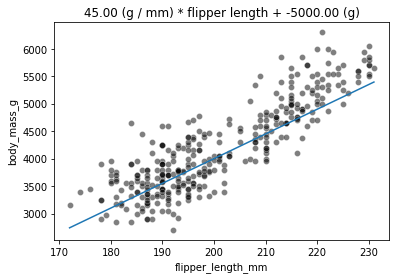

In [5]:
label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"

ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

La variable `weight_flipper_length` es un peso aplicado a la feature `flipper_length` para realizar la inferencia. Cuando este coeficiente es positivo, significa que los pingüinos con las aletas más largas tendrán mayor peso corporal. Si el coeficiente es negativo, significa que los pingüinos con las aletas más cortas tendrán mayor peso corporal. Gráficamente, este coeficiente se representa por la pendiente de la curva de la gráfica. A continuación, mostraremos cómo sería la curva cuando el coeficiente `weight_flipper_length` es negativo.

In [6]:
weight_flipper_length = -40
intercept_body_mass = 13000

predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass
)

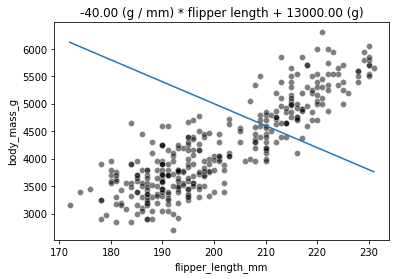

In [7]:
ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

En nuestro caso, este coeficiente tiene una unidad con significado: g/mm. Por ejemplo, un coeficiente de 40 g/mm significa que por cada milímetro adicional de longitud de aleta, el peso corporal predicho aumentará 40 g.

In [8]:
body_mass_180 = linear_model_flipper_mass(
    flipper_lenght=180, weight_flipper_length=40, intercept_body_mass=0)

body_mass_181 = linear_model_flipper_mass(
    flipper_lenght=181, weight_flipper_length=40, intercept_body_mass=0)

print(f"El peso corporal para una longitud de aleta de 180 mm "
      f"es {body_mass_180} g \n"
      f"El peso corporal para una longitud de aleta de 181 mm "
      f"es {body_mass_181} g")

El peso corporal para una longitud de aleta de 180 mm es 7200 g 
El peso corporal para una longitud de aleta de 181 mm es 7240 g


También podemos observar que tenemos un parámetro `intercept_body_mass` en nuestro modelo. Este parámetro corresponde al valor del eje y si `flipper_length=0` (que en nuestro caso es solo una consideración matemática, ya que en nuestros datos el valor de `flipper_length` solo va de 170 mm hasta 230 mm). Este valor de y, cuando x=0 se denomina constante (*intercept*). Si `intercept_body_mass` es 0, la curva pasará por el origen:

In [9]:
weight_flipper_length = 25
intercept_body_mass = 0

# Redefinición de longitud de aleta para empezar en 0 para dibujar el valor de intercept
flipper_length_range = np.linspace(0, X.max(), num=300)
predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass)

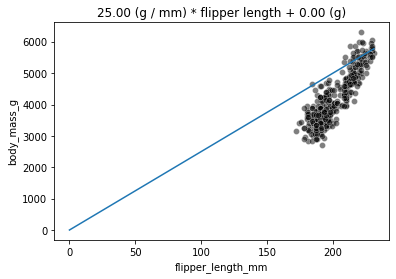

In [10]:
ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

De lo contrario, pasará por el valor de `intercept_body_mass`:

In [11]:
weight_flipper_length = 45
intercept_body_mass = -5000

predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass)

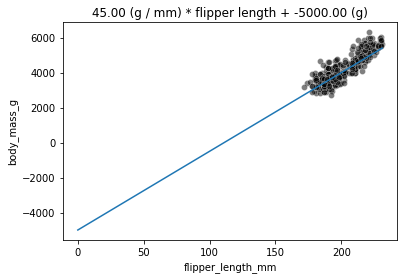

In [12]:
ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

# Regresión lineal usando scikit-learn

Cuando hacemos machine learning, estamos interesados en seleccionar el modelo que minimice al máximo el error en los datos disponibles. Hemos visto anteriormente que podríamos implementar un enfoque de fuerza bruta, variando los pesos y la constante y seleccionando el modelo con el menor error. Afortunadamente, este problema de encontrar los mejores valores de hiperparámetros (es decir, que dan como resultado el menor error) se puede solucionar sin necesidad de comprobar cada potencial combinación de parámetros. De hecho, este problema tiene una solución cerrada: los mejores valores de hiperparámetros se encuentran resolviendo una ecuación. Esto evita la necesidad de búsqueda por fuerza bruta. Esta estrategia está implementada en scikit-learn.

In [13]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X, y)

LinearRegression()

La instancia `linear_regression` almacenará los valores de parámetros en los atributos `coef_` e `intercept_`. Podemos comprobar que el modelo óptimo encontrado es:

In [14]:
weight_flipper_length = linear_regression.coef_[0]
weight_flipper_length

array([49.68556641])

In [15]:
intercept_body_mass = linear_regression.intercept_
intercept_body_mass

array([-5780.83135808])

Usaremos el peso e intercept para dibujar el modelo encontrado usando scikit-learn.

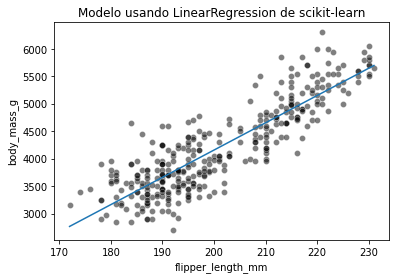

In [16]:
flipper_length_range = np.linspace(X.min(), X.max(), num=300)
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass)

sns.scatterplot(x=X[feature_name], y=y[target_name], color="black", alpha=0.5)
plt.plot(flipper_length_range, predicted_body_mass)
_ = plt.title("Modelo usando LinearRegression de scikit-learn")

Vamos a calcular el error cuadrático medio.

In [17]:
from sklearn.metrics import mean_squared_error

inferred_body_mass = linear_regression.predict(X)
model_error = mean_squared_error(y, inferred_body_mass)
print(f"El error cuadrático medio del modelo óptimo es {model_error:.2f}")

El error cuadrático medio del modelo óptimo es 154546.19


Un modelo de regresión lineal minimiza el error cuadrático medio en el conjunto de entrenamiento. Esto significa que los parámetros obtenidos tras el entrenamiento (es decir, `coef_` e `intercept_`) son los parámetros óptimos que minimizan el error cuadrático medio. En otras palabras, cualquier otra combinación de parámetros producirá un modelo con un error cuadrático medio mayor en el conjunto de entrenamiento.

Sin embargo, el error cuadrático medio es difícil de interpretar. El error absoluto medio es más intuitivo, dado que proporciona un error en las mismas unidades que las del objetivo.

In [18]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(y, inferred_body_mass)
print(f"El error absoluto medio del modelo óptimo es {model_error:.2f} g")

El error absoluto medio del modelo óptimo es 313.00 g


Un error absoluto medio de 313 significa que, de media, nuestro modelo produce un error de +/- 313 gramos cuando predice el peso corporal de un pingüino dada la longitud de su aleta.

# Regresión lineal sin relación de linealidad entre los datos y el objetivo

Aunque la parametrización de modelos lineales no se adapte de forma nativa al problema en cuestión, aún es posible hacer modelos lineales más expresivos mediante la ingeniería de features adicionales. Un pipeline de machine learning que combina un paso de ingeniería de features no lineales seguido por un paso de regresión lineal puede considerarse un modelo de regresión no lineal en su conjunto.

Para ilustar estos conceptos, vamos a generar un dataset.

In [19]:
rng = np.random.RandomState(0)

n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
# sort the data to make plotting easier later
X = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
noise = rng.randn(n_sample) * .3
y = X ** 3 - 0.5 * X ** 2 + noise

Para dibujar fácilmente el dataset, crearemos un dataframe de pandas que contenga los datos y el objetivo.

In [20]:
full_data = pd.DataFrame({"input_feature": X, "target": y})

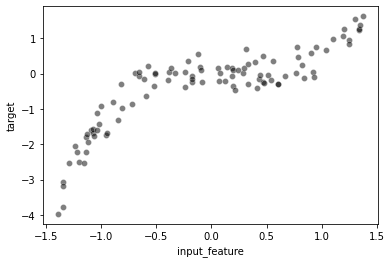

In [21]:
_ = sns.scatterplot(data=full_data, x="input_feature", y="target",
                    color="black", alpha=0.5)

Por convención, en scikit-learn los datos (`X`) deben ser una matriz 2D de tamaño (`n_samples, n_features`). Si los datos son un vector 1D, necesitamos redimensionarlos en una matriz con una única columna si el vector representa una feature o una única fila si el vector representa una instancia.

In [22]:
X = X.reshape(-1, 1)
X.shape

(100, 1)

In [23]:
linear_regression = LinearRegression()
linear_regression.fit(X, y)
y_predicted = linear_regression.predict(X)

In [24]:
mse = mean_squared_error(y, y_predicted)

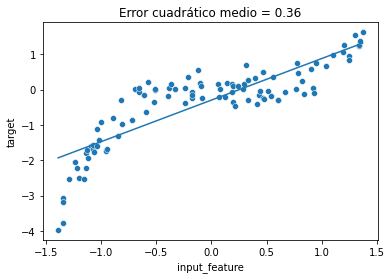

In [25]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target")
ax.plot(X, y_predicted)
_ = ax.set_title(f"Error cuadrático medio = {mse:.2f}")

Aquí el coeficiente e intercept aprendidos por `LinearRegression` definen la mejor "línea recta" que ajusta los datos. Vamos a inspeccionar dichos parámetros:

In [26]:
print(f"peso: {linear_regression.coef_[0]:.2f}, "
      f"intercept: {linear_regression.intercept_:.2f}")

peso: 1.18, intercept: -0.29


Es importante tener en cuenta que el modelo aprendido no es capaz de manejar relaciones no lineales entre `X` e `y` dado que los modelos lineales asumen una relación lineal entre `X` e `y`. Por tanto, existen 3 posibilidades para resolver este problema:

+ elegir un modelo que pueda manejar nativamente la no linealidad,
+ diseñar un conjunto más rico de features al incluir conocimiento experto que pueda usarse directamente por un modelo lineal simple, o
+ usar un "kernel" para tener una función de decisión local en lugar de tener un función de decisión global.

Vamos a ilustrar rápidamente el primer punto usando un regresor de árbol de decisión que puede manejar nativamente la no linealidad.

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3).fit(X, y)
y_predicted = tree.predict(X)
mse = mean_squared_error(y, y_predicted)

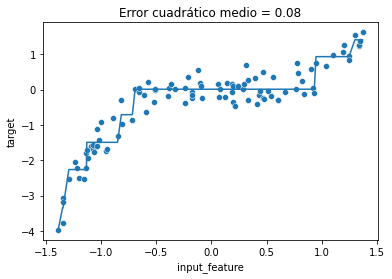

In [28]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target")
ax.plot(X, y_predicted)
_ = ax.set_title(f"Error cuadrático medio = {mse:.2f}")

En lugar de tener un modelo que pueda manejarse nativamente con la no linealidad, también podríamos crear nuevas features, derivadas de las features originales, usando algún conocimiento experto. En este ejemplo, sabemos que tenemos una relación cúbica y cuadrática entre `X` e `y` (porque hemos generado los datos). Por tanto, podemos crear dos nuevas features (`X ** 2` y `X ** 3`). Este tipo de transformación de denomina expansión de features polinomial.

In [29]:
X.shape

(100, 1)

In [30]:
X_expanded = np.concatenate([X, X ** 2, X ** 3], axis=1)
X_expanded.shape

(100, 3)

In [31]:
linear_regression.fit(X_expanded, y)
y_predicted = linear_regression.predict(X_expanded)
mse = mean_squared_error(y, y_predicted)

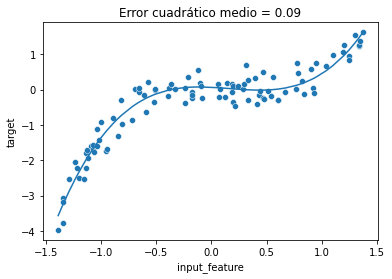

In [32]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target")
ax.plot(X, y_predicted)
_ = ax.set_title(f"Error cuadrático medio = {mse:.2f}")

Podemos ver que incluso con un modelo lineal, podemos superar la limitación de linealidad  del modelo añadiendo componentes no lineales en el diseño de features adicionales. Aquí, hemos creado nuevas features conociendo la forma en que el objetivo fue generado.

En lugar de crear manualmente tales features polinómicas podríamos usar directamente [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). Para demostrar el uso de la clase `PolynomialFeatures`, usamos un pipeline que en primer lugar transforma las features y luego entrena el modelo de regresión.

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression(),
)
polynomial_regression.fit(X, y)
y_predicted = polynomial_regression.predict(X)
mse = mean_squared_error(y, y_predicted)

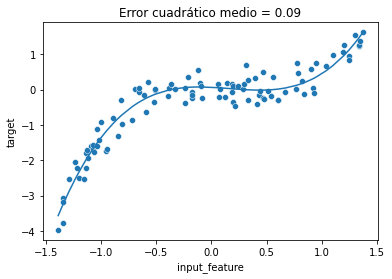

In [34]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target")
ax.plot(X, y_predicted)
_ = ax.set_title(f"Error cuadrático medio = {mse:.2f}")

Como se esperaba, observamos que las predicciones de este pipeline `PolynomialFeatures` son iguales que las predicciones del modelo lineal entrenado con las features creadas manualmente.

La última posibilidad para hacer un modelo lineal más expresivo es usar un "kernel". En lugar de aprender un peso por feature como enfatizamos anteriormente, se asignará un peso a cada muestra. Sin embargo, no se usarán todas las muestras. Esta es la base de algoritmo de *support vector machine* (SVM). Para más detalles del este algoritmo se puede acudir a la [documentación de scikit-learn](https://scikit-learn.org/stable/modules/svm.html).

En este caso, solo vamos a desarrollar algunas intuiciones en el poder expresivo relativo de SVM con kernels lineales y no lineales entrenándolo en el mismo dataset.

En primer lugar, vamos a considerar un SVM con un kernel lineal:

In [35]:
from sklearn.svm import SVR

svr = SVR(kernel="linear")
svr.fit(X, y)
y_predicted = svr.predict(X)
mse = mean_squared_error(y, y_predicted)

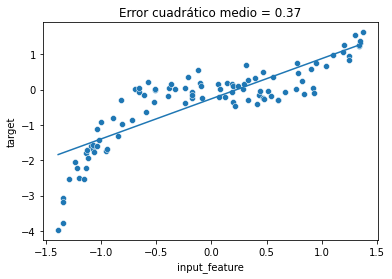

In [36]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target")
ax.plot(X, y_predicted)
_ = ax.set_title(f"Error cuadrático medio = {mse:.2f}")

Las predicciones de nuestro SVR con un kernel lineal están todas alineadas en una línea recta. `SVR(kernel="linear")` es de hecho otro ejemplo de modelo lineal.

El estimador también se puede configurar para usar un kernel no lineal. Luego, puede aprender una función de predicción que calcule la interacción no lineal entre muestras para las que queremos hacer una predicción y seleccionar muestras del conjunto de entrenamiento.

El resultado es otro tipo de modelo de regresión no lineal con una expresividad similar a nuestro pipeline previo de regresión polinómica:

In [37]:
svr = SVR(kernel="poly", degree=3)
svr.fit(X, y)
y_predicted = svr.predict(X)
mse = mean_squared_error(y, y_predicted)

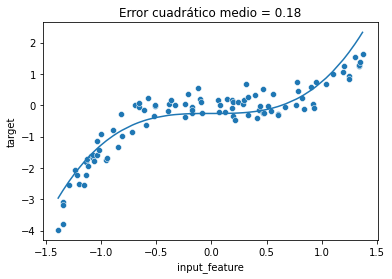

In [38]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target")
ax.plot(X, y_predicted)
_ = ax.set_title(f"Error cuadrático medio = {mse:.2f}")

Los métodos de kernel como SVR son muy eficientes para datasets pequeños o medianos. Para datasets grandes con `n_samples > 10000`, a menudo resulta mas eficiente computacionalmente explicitar features de expansión usando `PolynomialFeatures` u otros transformadores no lineales de scikit-learn, como [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html) or [Nystroem](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.Nystroem.html).

Vamos a dar una visión intuitiva de las predicciones que podríamos obtener usando nuestro dataset de juguete:

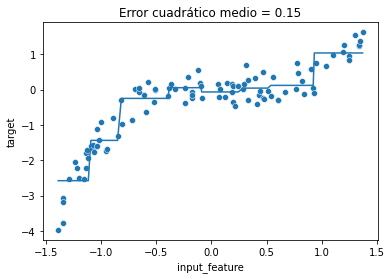

In [39]:
from sklearn.preprocessing import KBinsDiscretizer

binned_regression = make_pipeline(
    KBinsDiscretizer(n_bins=8),
    LinearRegression(),
)
binned_regression.fit(X, y)
y_predicted = binned_regression.predict(X)
mse = mean_squared_error(y, y_predicted)

ax = sns.scatterplot(data=full_data, x="input_feature", y="target")
ax.plot(X, y_predicted)
_ = ax.set_title(f"Error cuadrático medio = {mse:.2f}")

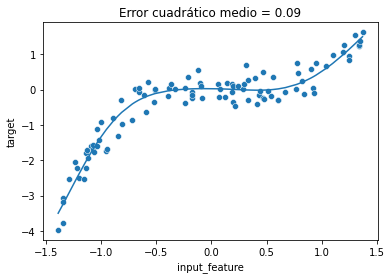

In [40]:
from sklearn.kernel_approximation import Nystroem

nystroem_regression = make_pipeline(
    Nystroem(n_components=5),
    LinearRegression(),
)
nystroem_regression.fit(X, y)
y_predicted = nystroem_regression.predict(X)
mse = mean_squared_error(y, y_predicted)

ax = sns.scatterplot(data=full_data, x="input_feature", y="target")
ax.plot(X, y_predicted)
_ = ax.set_title(f"Error cuadrático medio = {mse:.2f}")

# Regularización de modelos de regresión lineales

Vamos a ver las limitaciones de los modelos de regresión lineales y las ventajas de usar, en su lugar, modelos regularizados. También veremos el preprocesamiento requerido cuando lidiamos con modelos regularizados, además de la regularización de parámetros necesarios para ajustarlos.

Empezaremos destacando el problema de overfitting que puede surgir con un simpel modelo de regresión lineal.

En primer lugar, carguemos el dataset de la vivienda de California.

In [41]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(as_frame=True, return_X_y=True)
y *= 100  #reescala el objetivo en k$
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Ya vimos que los modelos lineales pueden usarse incluso en configuraciones donde `X` e `y` no tengan relaciones de linealidad. También vimos que se puede usar el transformador  `PolynomialFeatures` para crear features adicionales, codificando interaciones no lineales entre features.

Ahora usaremos este transformador para aumentar el espacio de features. Posteriormente, entrenaremos un modelo de regresión lineal. Usaremos el conjunto de prueba externo para evaluar las capacidades de generalización de nuestro modelo.

In [42]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

linear_regression = make_pipeline(PolynomialFeatures(degree=2),
                                  LinearRegression())
cv_results = cross_validate(linear_regression, X, y,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

Podemos comparar el error cuadrático medio en el conjunto de entrenamiento y prueba para verificar el rendimiento de generalización de nuestro modelo.

In [43]:
train_error = -cv_results["train_score"]
print(f"Error cuadrático medio del modelo de regresión lineal en el conjunto de entrenamiento: \n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

Error cuadrático medio del modelo de regresión lineal en el conjunto de entrenamiento: 
4190.212 +/- 151.123


In [44]:
test_error = -cv_results["test_score"]
print(f"Error cuadrático medio del modelo de regresión lineal en el conjunto de prueba: \n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Error cuadrático medio del modelo de regresión lineal en el conjunto de prueba: 
13334.943 +/- 20292.681


La puntuación en el conjunto de entrenamiento es mucho mejor. Esta diferencia del rendimiento de generalización entre la puntuación de entrenmiento y la de prueba es una indicación de que nuestro modelo sobreajustó nuestro conjunto de entrenamiento. De hecho, este es uno de los problemas cuando aumentamos el número de características con un transformador `PolynomialFeatures`. Nuestro modelo se centrará en algunas features específicas. Podemos comprobar los pesos del modelo para tener confirmación de esto. Vamos a crear un dataframe: las columnas contendrán el nombre de la feature mientras que la fila contendrá los valores de los coeficientes almacenados para cada modelo durante la validación cruzada.

Dado que usamos un `PolynomialFeature` para aumentar los datos, crearemos nombres de features representativos de cada combinación de features. Scikit-learn ofrece el método `get_feature_names_out` para este propósito. En primer lugar, obtengamos el primer modelo entrenado de la validación cruzada.

In [45]:
model_first_fold = cv_results["estimator"][0]

Ahora podemos acceder al `PolynomialFeatures` entrenado para generar los nombre de las features.

In [46]:
feature_names = model_first_fold[0].get_feature_names_out(
    input_features=X.columns)
feature_names

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

Finalmente, podemos crear el dataframe conteniendo toda la información.

In [47]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear_regression = pd.DataFrame(coefs, columns=feature_names)

Ahora vamos a usar un boxplot para ver las variaciones de los coeficientes.

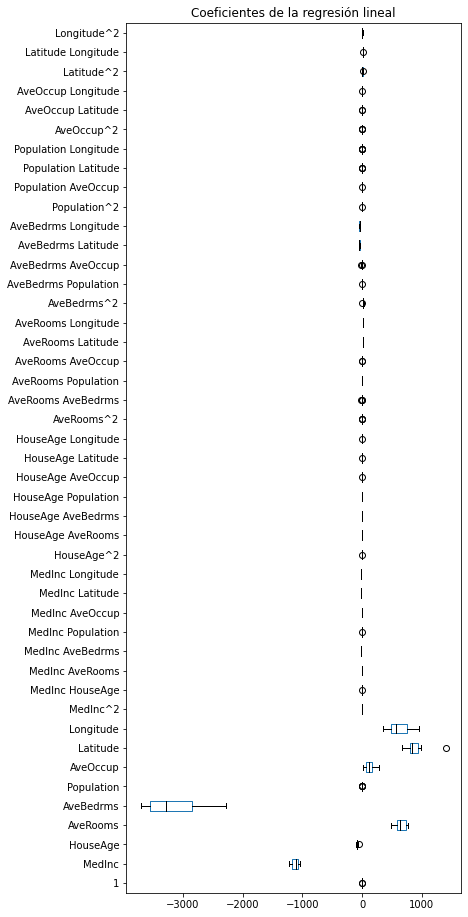

In [48]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_linear_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Coeficientes de la regresión lineal")

Podemos forzar al modelo de regresión lineal a considerar todas las features de un forma más homogénea. De hecho, podríamos forzar a un mayor peso positivo o un menor peso tendente a cero. Esto se conoce como **regularización**. Usaremos un modelo ridge que fuerza tal comportamiento.

In [49]:
from sklearn.linear_model import Ridge

ridge = make_pipeline(PolynomialFeatures(degree=2),
                      Ridge(alpha=100))
cv_results = cross_validate(ridge, X, y,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.672e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.67257e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.75536e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.67367e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:15

El código anterior genera varios warnings debido a que las features incluidas tiene valores extremadamentes grandes o extremadamente pequeños, lo que causa problemas numéricos cuando entrenamos el modelo predictivo.

Vamos a explorar las puntuaciones de entrenamiento y prueba de este modelo.

In [50]:
train_error = -cv_results["train_score"]
print(f"Error cuadrático medio del modelo de regresión lineal en el conjunto de entrenamiento: \n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

Error cuadrático medio del modelo de regresión lineal en el conjunto de entrenamiento: 
4373.180 +/- 153.942


In [51]:
test_error = -cv_results["test_score"]
print(f"Error cuadrático medio del modelo de regresión lineal en el conjunto de prueba: \n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Error cuadrático medio del modelo de regresión lineal en el conjunto de prueba: 
7303.589 +/- 4950.732


Vemos que las puntuaciones de entrenamiento y prueba son muchas más cercanas, lo que indica que nuestro modelo tiene menos overfitting. Podemos comparar los valores de los pesos de ridge con una regresión lineal no regularizada.

In [52]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

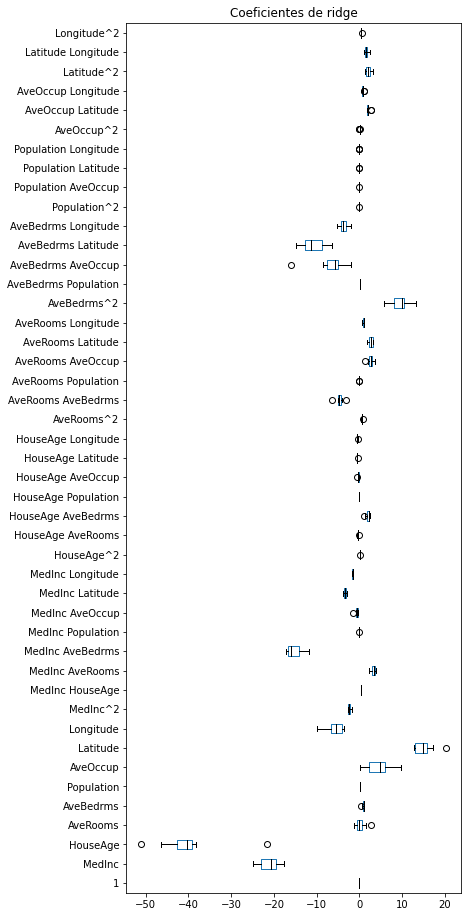

In [53]:
weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Coeficientes de ridge")

Comparando la magnitud de los pesos de este gráfico con los del anterior, vemos que un modelo ridge fuerza que todos los pesos tengan una magnitud similar, mientras que la magnitud general de los pesos tiende a cero con respecto a los del modelo de regresión lineal.

Sin embargo, en este ejemplo, omitimos dos aspectos importantes: (i) la necesidad de escalar los datos y (ii) la necesidad de buscar el mejor parámetro de regularización.

## Escalado de features y regularización

Por un lado, los pesos definen el vínculo entre los valores de las features y el objetivo predicho. Por otro lado, la regularización añade restricciones en los pesos del modelo a través del parámetro `alpha`. Por lo tanto, el efecto que el escalado de features tiene en los pesos finales también interactúa con la regularización.

Consideremos el caso donde las features viven en la misma escala/unidades: si el modelo determina que dos features son igualmente importantes, se verán afectadas de forma similar por la fuerza de la regularización.

Ahora, consideremos el escenario donde las features tienen escalas completamente diferentes (por ejemplo la edad en años y los ingresos anuales en dólares). Si dos features son tan importantes, nuestro modelo aumentará los pesos de las features con menor escala y reducirá los pesos de las features con mayor escala.

Recordemos que la regularización fuerza la cercanía de los pesos. Por tanto, intuitivamente, si queremos usar regularización, tratar con datos reescalados podría facilitar el encontrar un parámetro de regularización óptimo y, por tanto, un modelo más adecuado.

Como nota adicional, algunos solucionadores basados en cálculo de gradiente esperan tales datos reescalados. Los datos sin escalar serán perjudiciales cuando calculemos los pesos óptimos. Por lo tanto, cuando trabajamos con un modelo lineal y datos numéricos es una buena práctica escalar los datos.

Así que vamos a añadir un `StandardScaler` en el pipeline de machine learning. Este scaler será ubicado justo antes del regresor.

In [54]:
from sklearn.preprocessing import StandardScaler

ridge = make_pipeline(PolynomialFeatures(degree=2),
                      StandardScaler(),
                      Ridge(alpha=0.5))
cv_results = cross_validate(ridge, X, y,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

In [55]:
train_error = -cv_results["train_score"]
print(f"Error cuadrático medio del modelo de regresión lineal en el conjunto de entrenamiento: \n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

Error cuadrático medio del modelo de regresión lineal en el conjunto de entrenamiento: 
4347.036 +/- 156.666


In [56]:
test_error = -cv_results["test_score"]
print(f"Error cuadrático medio del modelo de regresión lineal en el conjunto de prueba: \n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Error cuadrático medio del modelo de regresión lineal en el conjunto de prueba: 
5508.472 +/- 1816.642


Observamos que el escalado de los datos tiene un impacto positivo en la puntuación de prueba y dicha puntuación es más cercana a la puntuación de entrenamiento. Significa que nuestro modelo tiene menos overfitting y que se encuentra más cerca del punto óptimo de generalización.

Echemos un vistazo adicional a los diferentes pesos.

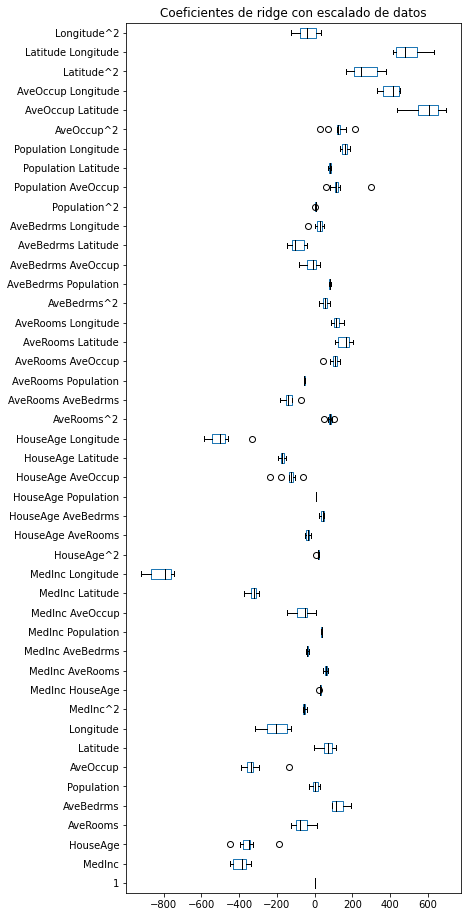

In [57]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Coeficientes de ridge con escalado de datos")

Comparando con los gráficos anteriores, vemos que ahora todas las magnitudes de los pesos están más cercanas y todas las features contribuyen de forma más igualitaria.

En el ejemplo anterior, establecimos `alpha=0.5`. Vamos a comprobar el impacto de `alpha` si incrementamos su valor.

In [58]:
ridge = make_pipeline(PolynomialFeatures(degree=2),
                      StandardScaler(),
                      Ridge(alpha=1_000_000))
cv_results = cross_validate(ridge, X, y,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

In [59]:
train_error = -cv_results["train_score"]
print(f"Error cuadrático medio del modelo de regresión lineal en el conjunto de entrenamiento: \n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

Error cuadrático medio del modelo de regresión lineal en el conjunto de entrenamiento: 
12020.650 +/- 399.508


In [60]:
test_error = -cv_results["test_score"]
print(f"Error cuadrático medio del modelo de regresión lineal en el conjunto de prueba: \n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Error cuadrático medio del modelo de regresión lineal en el conjunto de prueba: 
12543.890 +/- 3846.344


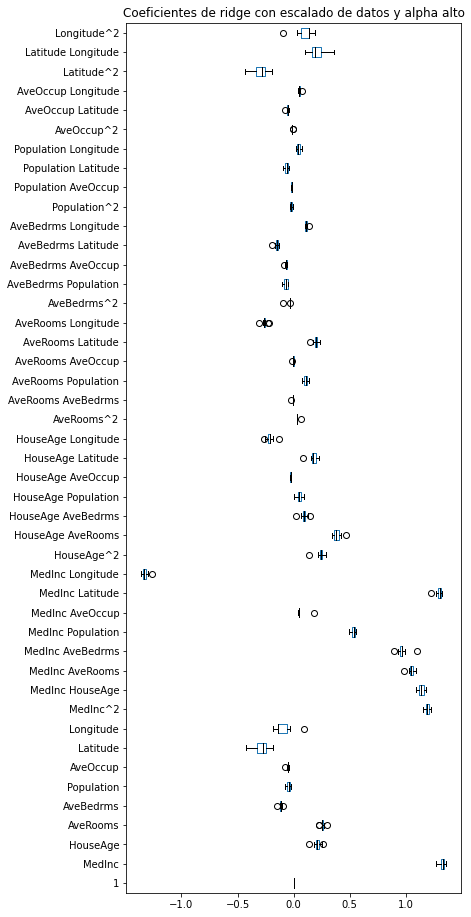

In [61]:
coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Coeficientes de ridge con escalado de datos y alpha alto")

Mirando específicamente los valores de los pesos, observamos que incrementar el valor de `alpha` hace disminuir los valores de los pesos. Un valor negativo de `alpha` en realidad mejoraría los pesos grandes y promovería el overfitting.

Aquí nos hemos enfocado en las features numéricas. Para las features categóricas es generalmente común omitir el escalado cuando las features están codificadas con `OneHotEncoder`, dado que los valores de las features ya se encuentran en una escala similar. Sin embargo, esta opción puede cuestionarse, dado que el escalado también interactúa con la regularización. Por ejemplo, escalar las features categóricas que están desbalanceadas (por ejemplo, más ocurrencias de una categoría específica) igualaría el impacto de la regularización en cada categoría. Sin embargo, escalar tales features en presencia de categorías raras podría ser problemático (es decir, división por una desviación típica muy pequeña) y podría introducir, además, problemas numéricos.

En los análisis anteriores, no estudiamos si el parámetro `alpha` tenía un efecto en el rendimiento. Seleccionamos el parámetro de antemano y lo fijamos para el análisis. Vamos a comprobar el impacto de este parámetro en la regularización y cómo podemos ajustarlo.

## Ajuste del parámetro de regularización

Como decíamos, el parámetro de regularización necesita ser ajustado en cada dataset. El parámetro por defecto no conducirá al modelo óptimo. Por lo tanto, necesitamos ajustar el parámetro `alpha`.

El ajuste de hiperparámetros del modelo debe hacerse con cuidado. Queremos encontrar un parámetro óptimo que maximice algunes métricas. Por tanto, requiere tanto del conjunto de entrenamiento como del conjunto de prueba.

Sin embargo, este conjunto de prueba debería ser diferente del conjunto de prueba externo que usemos para evaluar nuestro modelo: si usamos el mismo, estamos usando un `alpha` que ha sido optimizado para este conjunto de prueba y rompería la regla de que sea externo a la muestra.

Por tanto, debemos incluir la búsqueda del hiperparámetro `alpha` en la validación cruzada. Como vimo anteriormente, podemos usar un grid-search. Sin embargo, algunos predictores de scikit-learn cuentan con una búsqueda de hiperparámetros integrada más eficiente que usar grid-search. El nombre de esos predictores termina por `CV`. En el caso de `Ridge`, scikit-learn proporciona el regresor `RidgeCV`.

Así que podemos usar este predictor en el último paso del pipeline. Incluir en el pipeline una validaciónc cruzada permite realizar una validación cruzada anidada: la validación cruzada interna buscará el mejor alpha, mientras que la validación cruzada externa proporcionará una estimación de la puntuación de prueba.

In [62]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-2, 0, num=20)
ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),
                      RidgeCV(alphas=alphas, store_cv_values=True))

In [63]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, random_state=1)
cv_results = cross_validate(ridge, X, y,
                            cv=cv, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

In [64]:
train_error = -cv_results["train_score"]
print(f"Error cuadrático medio del modelo de regresión lineal en el conjunto de entrenamiento: \n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

Error cuadrático medio del modelo de regresión lineal en el conjunto de entrenamiento: 
4306.562 +/- 25.918


In [65]:
test_error = -cv_results["test_score"]
print(f"Error cuadrático medio del modelo de regresión lineal en el conjunto de prueba: \n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Error cuadrático medio del modelo de regresión lineal en el conjunto de prueba: 
4348.657 +/- 252.921


Optimizando `alpha`, vemos que se acercan las puntuaciones de entrenamiento y prueba. Lo que indica que nuestro modelo no tiene overfitting. Cuando entrenamos el regresor ridge, también le pedimos que almacene el error encontrado durante la validación cruzada (con el parámetro `store_cv_values=True`). Podemos dibujar el error cuadrático medio para las diferentes `alphas` que hemos intentado.

In [66]:
mse_alphas = [est[-1].cv_values_.mean(axis=0)
              for est in cv_results["estimator"]]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas

,0.010000,0.012743,0.016238,0.020691,0.026367,0.033598,0.042813,0.054556,0.069519,0.088587,0.112884,0.143845,0.183298,0.233572,0.297635,0.379269,0.483293,0.615848,0.784760,1.000000
0,7587.897141,7059.531216,6579.796667,6161.839629,5813.048345,5535.350138,5326.646369,5182.950517,5100.749049,5079.212663,5122.029454,5238.704149,5445.118890,5763.012259,6217.925433,6835.274126,7634.692137,8623.620241,9791.918443,11109.476019
1,7079.341771,6696.622046,6329.022308,5987.727181,5681.306000,5415.171818,5191.880969,5012.209177,4876.780585,4787.974274,4751.851652,4779.853646,4889.937328,5106.656625,5459.549144,5979.280717,6691.530974,7609.581815,8727.609953,10017.092899
2,24857.406605,21448.284772,18293.478416,15481.009011,13067.031991,11071.457116,9480.437579,8254.431555,7338.963939,6675.026438,6207.024331,5887.541169,5679.263698,5554.913823,5496.051755,5491.367683,5534.775517,5623.398006,5755.456140,5928.154410
3,7504.216958,7125.074257,6754.172985,6400.999897,6072.937965,5774.941819,5509.955509,5280.027720,5087.960263,4939.271829,4844.228092,4819.618117,4889.808854,5086.420585,5445.877349,6004.320850,6790.113763,7815.311733,9068.542918,10511.939341
4,6999.938808,6598.898743,6215.363499,5861.328579,5546.025773,5275.377052,5052.349007,4878.140850,4753.964890,4683.117084,4673.049960,4737.162496,4895.935124,5176.863333,5612.500529,6236.037942,7074.449338,8140.303978,9424.471281,10892.352852


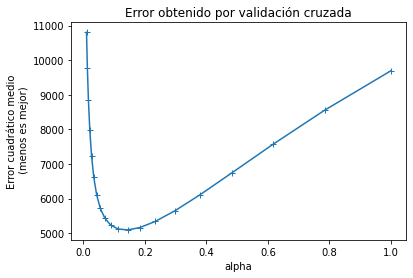

In [67]:
cv_alphas.mean(axis=0).plot(marker="+")
plt.ylabel("Error cuadrático medio\n (menos es mejor)")
plt.xlabel("alpha")
_ = plt.title("Error obtenido por validación cruzada")

Como podemos ver, la regularización es como la sal en la cocina: debemos equilibrar su cantidad para obtener el mejor rendimiento de generalización. Podemos comprobar si el mejor `alpha` encontrado es estable a través de las particiones de validación cruzada.

In [68]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
best_alphas

[0.08858667904100823,
 0.11288378916846889,
 0.37926901907322497,
 0.14384498882876628,
 0.11288378916846889]

La fuerza de regularización óptima no es necesariamente la misma en todas las iteraciones de validación cruzada. Pero dado que esperamos que cada remuestreo de validación cruzada provenga de la misma distribución de datos, es una práctica común usar el valor promedio del mejor `alpha` encontrado en las diferentes particiones de validación cruzada como nuestra estimación final para el `alpha` tuneado.

In [69]:
print(f"El alpha óptimo medio que conduce al mejor rendimiento de generalización es:\n"
      f"{np.mean(best_alphas):.2f} +/- {np.std(best_alphas):.2f}")

El alpha óptimo medio que conduce al mejor rendimiento de generalización es:
0.17 +/- 0.11


# Modelos lineales para clasificación

Vimos anteriormente el dataset de pingüinos. Sin embargo, en esta ocasión intentaremos predecir las especies de pingüinos usando la información del pico (en concreto, la cresta superior del pico). Vamos a simplificar el problema de clasificación seleccionando solo 2 de las especies para solucionar un problema de clasificación binaria.

In [70]:
penguins = pd.read_csv("penguins_classification.csv")

penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

Podemos empezar rápidamente visualizando la distribución de features por clase:

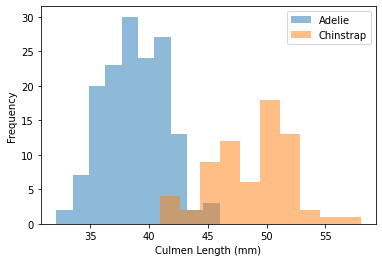

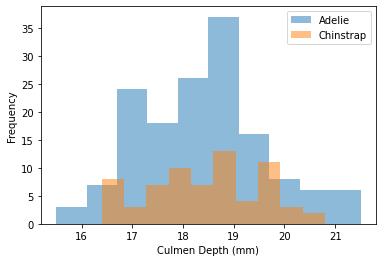

In [71]:
for feature_name in culmen_columns:
    plt.figure()
    penguins.groupby("Species")[feature_name].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feature_name)

Podemos observar que tenemos un problema bastante simple. Cuando la longitud del pico (*Culmen Length*) aumenta, la probabilidad de que el pingüino sea un Chinstrap es cercano a 1. Sin embargo, la anchura del pico (*Culmen Depth*) no es útil para predecir las especies de pingüinos.

Para el entrenamiento del modelo, separaremos el objetivo de los datos y crearemos un conjunto de entrenamiento y otro de prueba.

In [72]:
from sklearn.model_selection import train_test_split

X, y = train_test_split(penguins, random_state=0)

X_train = X[culmen_columns]
X_test = y[culmen_columns]

y_train = X[target_column]
y_test = y[target_column]

Cuando el objetivo es un resultado binario, podemos usar la función logística para modelar la probabilidad. Este modelo es conocido como regresión logística.

Scikit-learn proporciona la clase `LogisticRegression` que implementa este algoritmo.

In [73]:
from sklearn import set_config

set_config(display="diagram")

In [74]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="none")
)
logistic_regression.fit(X_train, y_train)
accuracy = logistic_regression.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy:.3f}")

Precisión en el conjunto de prueba: 1.000


Dado que estamos manejando un problema de clasificación que contiene solo 2 features, es posible observar el limite de la función de decisión. El límite es la regla usada por nuestro modelo predictivo para afectar una etiqueta de clase dados los valores de features de la instancia.

Aquí usaremos la clase `DecisionBoundaryDisplay`. Proporcionamos esta clase para permitir dibujar los límites de la función de decisión en un espacio de 2 dimensiones.

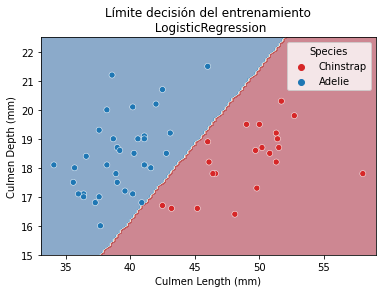

In [75]:
from plotting import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    logistic_regression, X_test, response_method="predict", cmap="RdBu_r", alpha=0.5
)
sns.scatterplot(
    data=y, x=culmen_columns[0], y=culmen_columns[1],
    hue=target_column, palette=["tab:red", "tab:blue"])
_ = plt.title("Límite decisión del entrenamiento\n LogisticRegression")


Vemos que nuestra función de decisión está representada por una línea separando las dos clases. También debemos tener en cuenta que no impusimos ninguna regularización estableciendo el parámetro `penalty` a `none`. Dado que la línea es oblícua significa que hemos usado una combinación de ambas features:

In [76]:
coefs = logistic_regression[-1].coef_[0]  # los coeficientes son una matriz 2d
weights = pd.Series(coefs, index=culmen_columns)

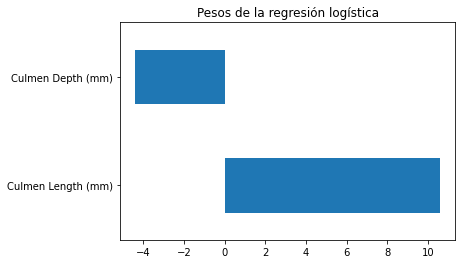

In [77]:
weights.plot.barh()
_ = plt.title("Pesos de la regresión logística")

# Más allá de la separación lineal en la clasificación

Como vimos anteriormente, el modelo de clasificación lineal espera que los datos sean linealmente separables. Cuando esta asunción no se cumple, el modelo no es suficientemente expresivo para ajustarse a los datos. Por tanto, necesitamos aplicar los mismos trucos que en la regresión: aumento de features (potencialmente usando conocimiento experto) o usar un método basado en kernel.

Proporcionaremos ejemplos donde usaremos un kernel SVM para ejecutar clasificación en algún dataset de juguete donde es imposible encontrar una separación lineal perfecta.

Generaremos un primer dataset donde los datos están representados como semicírculos entrelazados. Este dataset se genera usando la función [`sklearn.datasets.make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html).

In [78]:
from sklearn.datasets import make_moons

feature_names = ["Feature #0", "Feature #1"]
target_name = "class"

X, y = make_moons(n_samples=100, noise=0.13, random_state=42)

moons = pd.DataFrame(np.concatenate([X, y[:, np.newaxis]], axis=1),
                     columns=feature_names + [target_name])
X_moons, y_moons = moons[feature_names], moons[target_name]

Dado que el dataset contiene únicamente dos features, podemos hacer un scatterplot para echarle un vistazo.

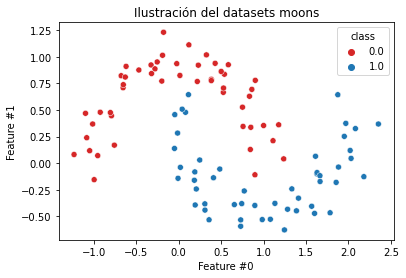

In [79]:
sns.scatterplot(data=moons, x=feature_names[0], y=feature_names[1],
                hue=y_moons, palette=["tab:red", "tab:blue"])
_ = plt.title("Ilustración del datasets moons")

De las intuiciones que obtuvimos de estudiar modelos lineales, debería ser obvio que un clasificador lineal no será capaz de encontrar un función de decisión perfecta para separar las dos clases. Intentemos ver cuál es el límite de decisión de tal clasificador lineal. Crearemos un modelo predictivo estandarizando el dataset seguido por un clasificador SVM lineal.

In [80]:
from sklearn.svm import SVC

linear_model = make_pipeline(StandardScaler(), SVC(kernel="linear"))
linear_model.fit(X_moons, y_moons)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

Tengamos en cuenta que entrenamos y verificamos el límite de decisión del clasificador en el mismo dataset, sin dividir el dataset en un conjunto de entrenamiento y uno de prueba. Aunque esto es una mala práctica, lo usamos aquí por simplicidad para representar el comportamiento del modelo. Siempre debemos usar validación cruzada para evaluar el rendimiento de generalización de un modelo de machine learning.

Vamos a comprobar el límite de decisión del modelo lineal en este dataset.

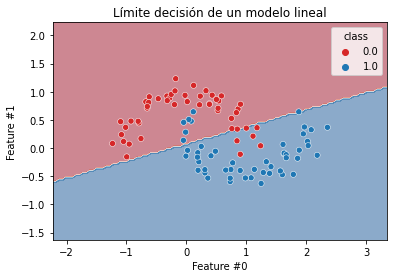

In [81]:
from plotting import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    linear_model, X_moons, response_method="predict", cmap="RdBu", alpha=0.5
)
sns.scatterplot(data=moons, x=feature_names[0], y=feature_names[1],
                hue=y_moons, palette=["tab:red", "tab:blue"])
_ = plt.title("Límite decisión de un modelo lineal")

Como era de esperar, un límite de decisión lineal no es lo suficientemente flexible para dividir las dos clases.

Para llevar este ejemplo al límite, crearemos otro dataset donde las muestras de una clase estén rodeadas por las de la otra clase.

In [82]:
from sklearn.datasets import make_gaussian_quantiles

feature_names = ["Feature #0", "Feature #1"]
target_name = "class"

X, y = make_gaussian_quantiles(
    n_samples=100, n_features=2, n_classes=2, random_state=42)

gauss = pd.DataFrame(np.concatenate([X, y[:, np.newaxis]], axis=1),
                     columns=feature_names + [target_name])
X_gauss, y_gauss = gauss[feature_names], gauss[target_name]

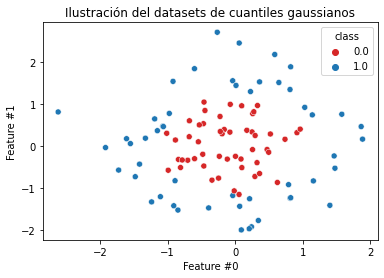

In [83]:
ax = sns.scatterplot(data=gauss, x=feature_names[0], y=feature_names[1],
                hue=y_gauss, palette=["tab:red", "tab:blue"])
_ = plt.title("Ilustración del datasets de cuantiles gaussianos")

Aquí es incluso más obvio que no es apta una función de decisión lineal. Podemos verificar qué función de decisión encontrará un SVM lineal.

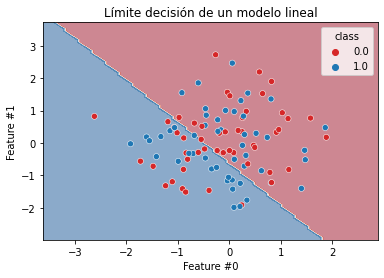

In [84]:
linear_model.fit(X_gauss, y_gauss)
DecisionBoundaryDisplay.from_estimator(
    linear_model, X_gauss, response_method="predict", cmap="RdBu", alpha=0.5
)
sns.scatterplot(data=gauss, x=feature_names[0], y=feature_names[1],
                hue=y_moons, palette=["tab:red", "tab:blue"])
_ = plt.title("Límite decisión de un modelo lineal")

Como era de esperar, no se puede usar una separación lineal para separar las clases apropiadamente: el modelo tendrá underfitting y generará errores incluso en el conjunto de entrenamiento.

Vimos anteriormente que podíamos usar varios trucos para hacer un modelo lineal más flexible aumentando las features o usando un kernel. Aquí usaremos la última solución usando un kernel de función de base radial (RBF) junto con un clasificador SVM.

Repetiremos los dos experimentos previos y comprobaremos la función de decisión obtenida.

In [85]:
kernel_model = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=5))

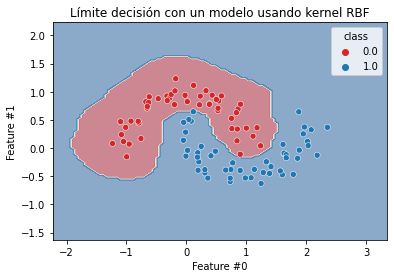

In [86]:
kernel_model.fit(X_moons, y_moons)
DecisionBoundaryDisplay.from_estimator(
    kernel_model, X_moons, response_method="predict", cmap="RdBu", alpha=0.5
)
sns.scatterplot(data=moons, x=feature_names[0], y=feature_names[1],
                hue=y_moons, palette=["tab:red", "tab:blue"])
_ = plt.title("Límite decisión con un modelo usando kernel RBF")

Vemos que el límite de decisión ya no es una línea recta. De hecho, se define un área alrededor de las muestras rojas y podemos imaginar que este clasificador debería ser capaz de generalizar a datos nunca vistos.

Verifiquemos la función de decisión del segundo dataset.

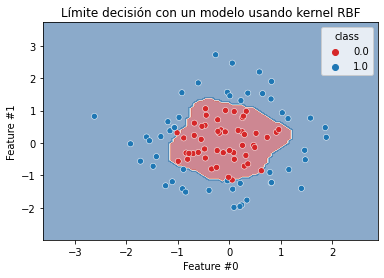

In [87]:
kernel_model.fit(X_gauss, y_gauss)
DecisionBoundaryDisplay.from_estimator(
    kernel_model, X_gauss, response_method="predict", cmap="RdBu", alpha=0.5
)
sns.scatterplot(data=gauss, x=feature_names[0], y=feature_names[1],
                hue=y_gauss, palette=["tab:red", "tab:blue"])
_ = plt.title("Límite decisión con un modelo usando kernel RBF")

Observamos algo similar al caso anterior. La función de decisión es más flexible y ya no produce underfitting. Por lo tanto, el truco del kernel o la expansión de features son trucos para hacer más expresivo un clasificador, exactamente igual a como vimos en la regresión.

Tengamos en mente que añadir flexibilidad a un modelo también puede conllevar el riesgo de incrementer el overfitting haciendo que la función de decisión sea sensible a puntos de datos individuales (posiblemente ruido) del conjunto de entrenamiento. Aquí podemos observar que las funciones de decisión permanecen lo suficientemente suaves para preservar una buena generalización. Por curiosidad, podemos repetir el experimento anterior con `gamma=100` y ver las funciones de decisión.

# Resumen

+ Las predicciones de un modelo lineal dependen de la suma ponderada de los valores de las variables de entrada añadido a un parámetros de intersección (intercept).
+ Entrenar un modelo lineal consiste en ajustar tanto el peso de los coeficientes como el valor de la constante para minimizar los errores de predicción en el conjunto de entrenamiento.
+ Para entrenar con éxito modelos lineales a menudo se requiere escalar las features de entrada aproximadamente al mismo rango dinámico.
+ La regualización se puede usar para reducir el overfitting: los coeficientes de los pesos se restringen para que se mantengan pequeños durante el entrenamiento.
+ Los hiperparámetros de regularización necesitan ser ajustados por validación cruzada para cada nuevo problema de machine learning y dataset.
+ Los modelos lineales se pueden usar en problemas donde la variable objetivo no se relaciona linealmente con las variables de entrada, pero esto requiere de ingeniería de features para transformar los datos a fin de evitar el underfitting.

Algunas referencias a seguir con ejemplos de algunos conceptos mencionados:

+ [Ejemplo de regresión lineal](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)
+ [Comparación entre una regresión lineal y un regresor ridge](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html#sphx-glr-auto-examples-linear-model-plot-ols-ridge-variance-py)